## Problem Statement

### WNS Analytics Wizard 2018
Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion

### Objective

*  The goal of this hackathon is to use data analysis and machine learning to predict promotion. This means you'll determine identifying the right people for promotion, based on past data.
*  They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

### Data Understanding

The dataset contains employee details along with information about their performance. The dataset includes features like:
### Observation
##### employee ID: Unique identifier for each employee
##### Demographics: Age, gender, region, education, etc.
##### Training Details: no_of_trainings, previous_year_rating, avg_training_score, etc.
##### Metrics: KPI, awards, service, etc.
##### is_promoted: Target variable indicating whether the employee recommended for Promotion

### Import Libraries

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc


import warnings
warnings.filterwarnings('ignore');

In [337]:
# read the data
train_df = pd.read_csv("wns_analytics_dataset/train_wns_analytics.csv")
test  = pd.read_csv("wns_analytics_dataset/test_wns_analytics.csv")

In [338]:
# total no.of rows and columns
train_df.shape, test.shape

((54808, 14), (23490, 13))

In [339]:
# To see columns of train dataset
train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

### Observation(s):

#### Number of datapoints: 78298
#### Number of features or attributes: 15

In [340]:
# To see first few data points in the dataset
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [341]:
# check the data frame info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [342]:
# get the dataypes
train_df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [343]:
# get all details of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [344]:
# to see the first few rows
train_df.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [345]:
# chk missing data
train_df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [346]:
# percentage of missing data in each column
(train_df.isna().sum()/train_df.shape[0]*100).sort_values()

employee_id             0.000000
department              0.000000
region                  0.000000
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
education               4.395344
previous_year_rating    7.524449
dtype: float64

In [347]:
# to check duplicates
train_df.duplicated().sum()

0

In [348]:
train_df[train_df.duplicated(['employee_id'], keep=False)]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [349]:
# check target data
train_df['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [350]:
# how much percentage of Imbalanced data available in the given dataset
train_df.is_promoted.value_counts(normalize=True)*100

is_promoted
0    91.482995
1     8.517005
Name: proportion, dtype: float64

<AxesSubplot:xlabel='is_promoted'>

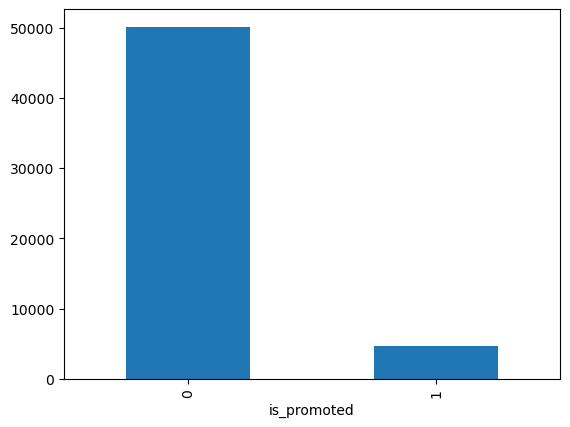

In [351]:
train_df.is_promoted.value_counts().plot(kind='bar')

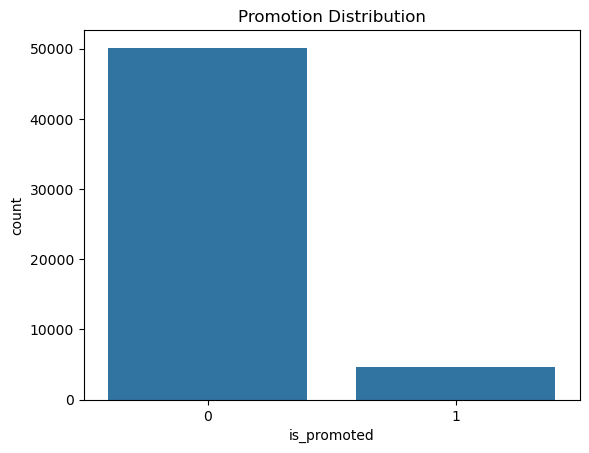

In [352]:
# Exploratory Data Analysis (EDA)
sns.countplot(x='is_promoted', data=train_df)
plt.title('Promotion Distribution')
plt.show()

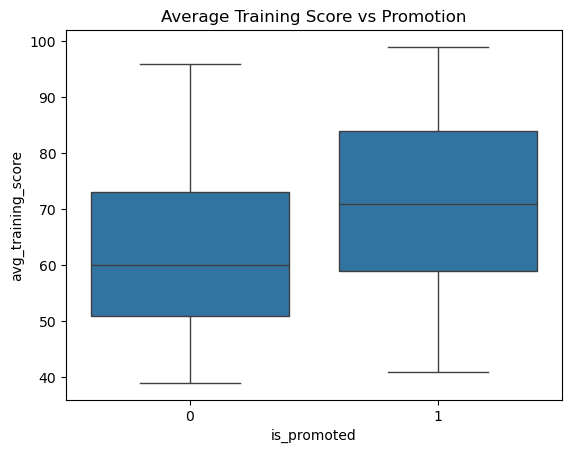

In [353]:
# Bivariate analysis
sns.boxplot(x='is_promoted', y='avg_training_score', data=train_df)
plt.title('Average Training Score vs Promotion')
plt.show()

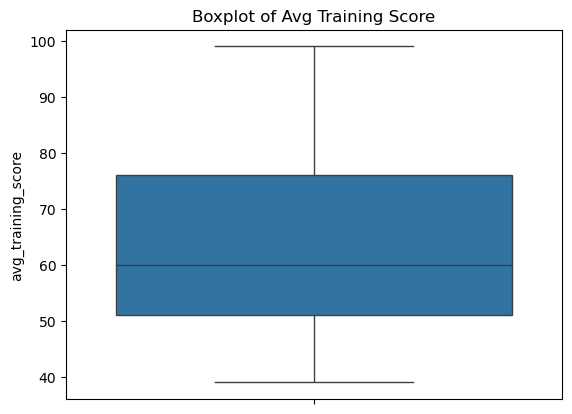

In [354]:
# Check for outliers
sns.boxplot(train_df['avg_training_score'])
plt.title('Boxplot of Avg Training Score')
plt.show()

In [355]:
# Handling outliers (if any)
q1 = train_df['avg_training_score'].quantile(0.25)
q3 = train_df['avg_training_score'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
train_df['avg_training_score'] = np.clip(train_df['avg_training_score'], lower_bound, upper_bound)

In [356]:
tgt_col = ['is_promoted']
ign_cols = ['employee_id']

In [357]:
# statistical info

train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [358]:
train_df.drop(columns=ign_cols).describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0




### Observation(s):

    no_of_trainings range between 1 to 10
    age of employee range from 20 to 60
    previous_year_rating range from 1 to 5
    An employee maximum survived for 37 years
    KPI is either 1 or 0 where 1 indicates an employee Percent of KPIs >80% otherwise 0
    awards_won = 1 means an employee was awarded during previous year otherwise 0
    Average score in current training evaluations range between 39 to 99

In [359]:
train_df.describe(include='object').T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


In [360]:
train_df.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [361]:
# check unique values

for col in train_df.drop(columns=ign_cols).columns:
    print(col,train_df[col].nunique(),  '=>', train_df[col].unique())

department 9 => ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region 34 => ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education 3 => ["Master's & above" "Bachelor's" nan 'Below Secondary']
gender 2 => ['f' 'm']
recruitment_channel 3 => ['sourcing' 'other' 'referred']
no_of_trainings 10 => [ 1  2  3  4  7  5  6  8 10  9]
age 41 => [35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 40 42 23 59 44 50
 56 20 25 47 36 46 60 43 22 54 58 48 53 55 51 52 21]
previous_year_rating 5 => [ 5.  3.  1.  4. nan  2.]
length_of_service 35 => [ 8  4  7 10  2  5  6  1  3 16  9 11 26 12 17

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

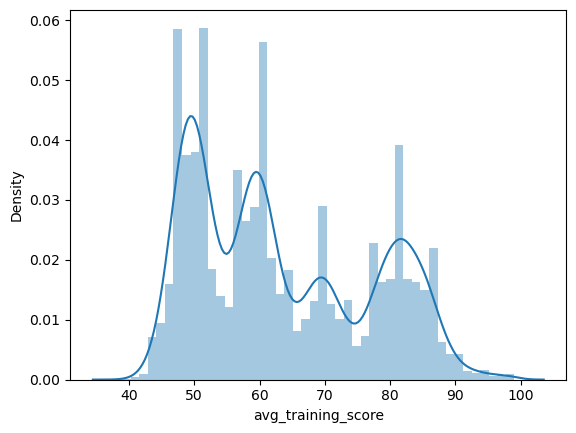

In [362]:
sns.distplot(train_df.avg_training_score)

<AxesSubplot:xlabel='length_of_service', ylabel='Density'>

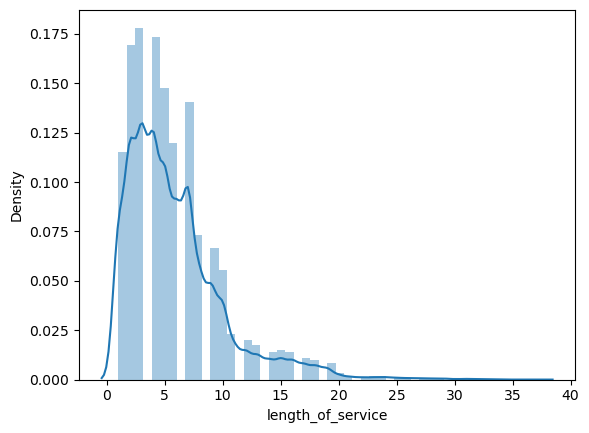

In [363]:
sns.distplot(train_df.length_of_service) 

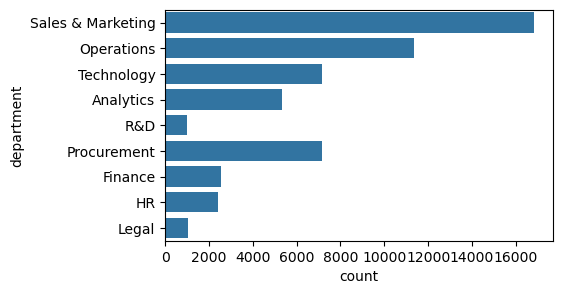

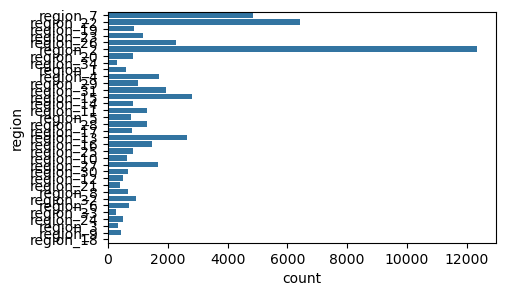

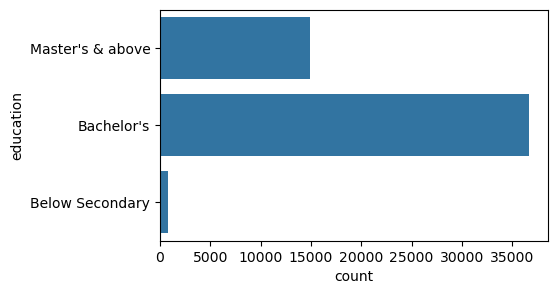

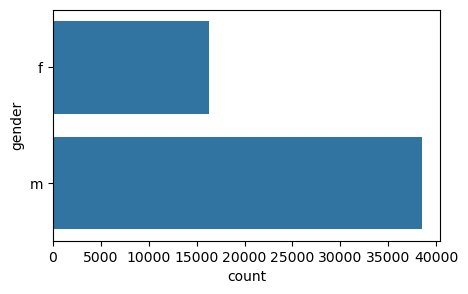

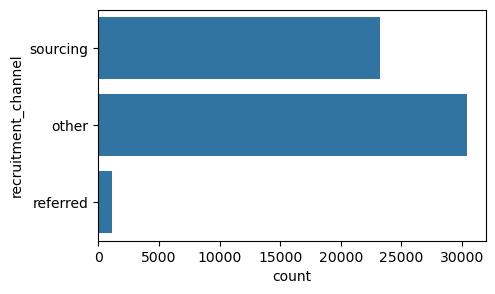

In [364]:
for col in train_df.select_dtypes(include='object').columns:
    plt.figure(figsize=(5,3))
    sns.countplot(y=train_df[col])
    plt.show()

<AxesSubplot:ylabel='avg_training_score,is_promoted'>

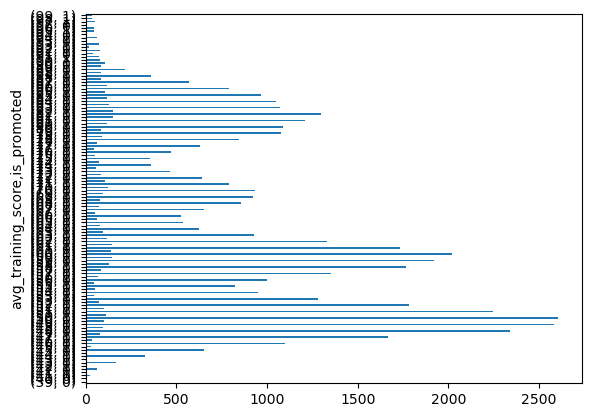

In [365]:
train_df[['avg_training_score','is_promoted']].groupby('avg_training_score').value_counts().plot(kind='barh')

In [366]:
exp_tgt = train_df[['avg_training_score','is_promoted']].groupby('avg_training_score').value_counts().unstack()
exp_tgt['%'] = exp_tgt[1]/(exp_tgt[0]+exp_tgt[1])*100
exp_tgt.sort_values(exp_tgt.columns[2], ascending=False)

is_promoted,0,1,%
avg_training_score,,,
96,1.0,47.0,97.916667
94,2.0,63.0,96.923077
93,9.0,75.0,89.285714
92,18.0,81.0,81.818182
91,41.0,76.0,64.957265
...,...,...,...
40,5.0,NaN,NaN
95,NaN,45.0,NaN
97,NaN,49.0,NaN


In [367]:
num_col = train_df.select_dtypes(include = 'number').columns

In [368]:
train_df[num_col].corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


<AxesSubplot:>

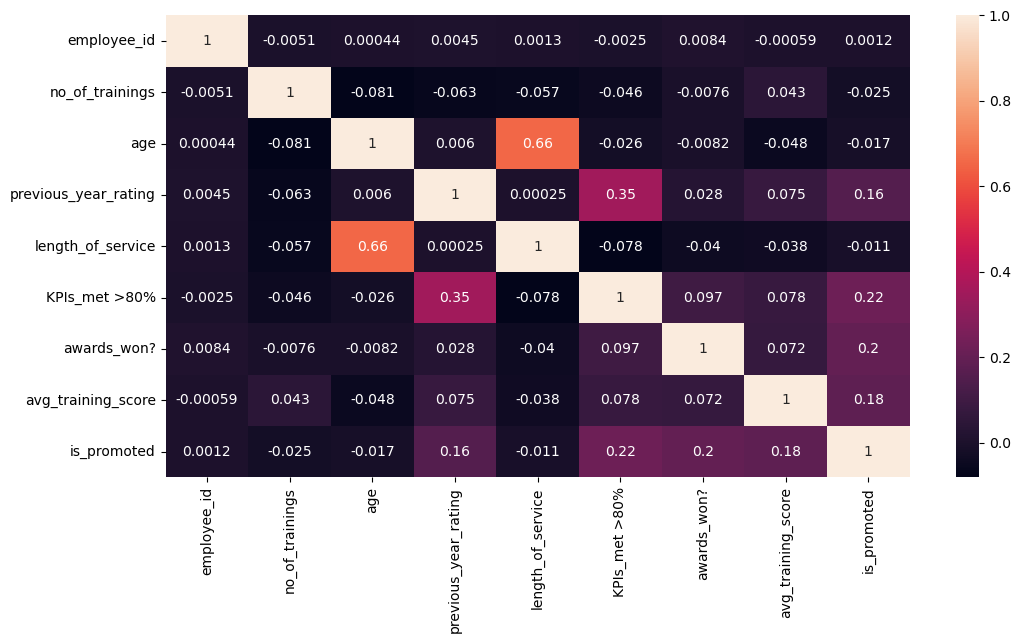

In [369]:
plt.figure(figsize=(12,6))
sns.heatmap(train_df[num_col].corr(), annot = True)

<Figure size 1200x600 with 0 Axes>

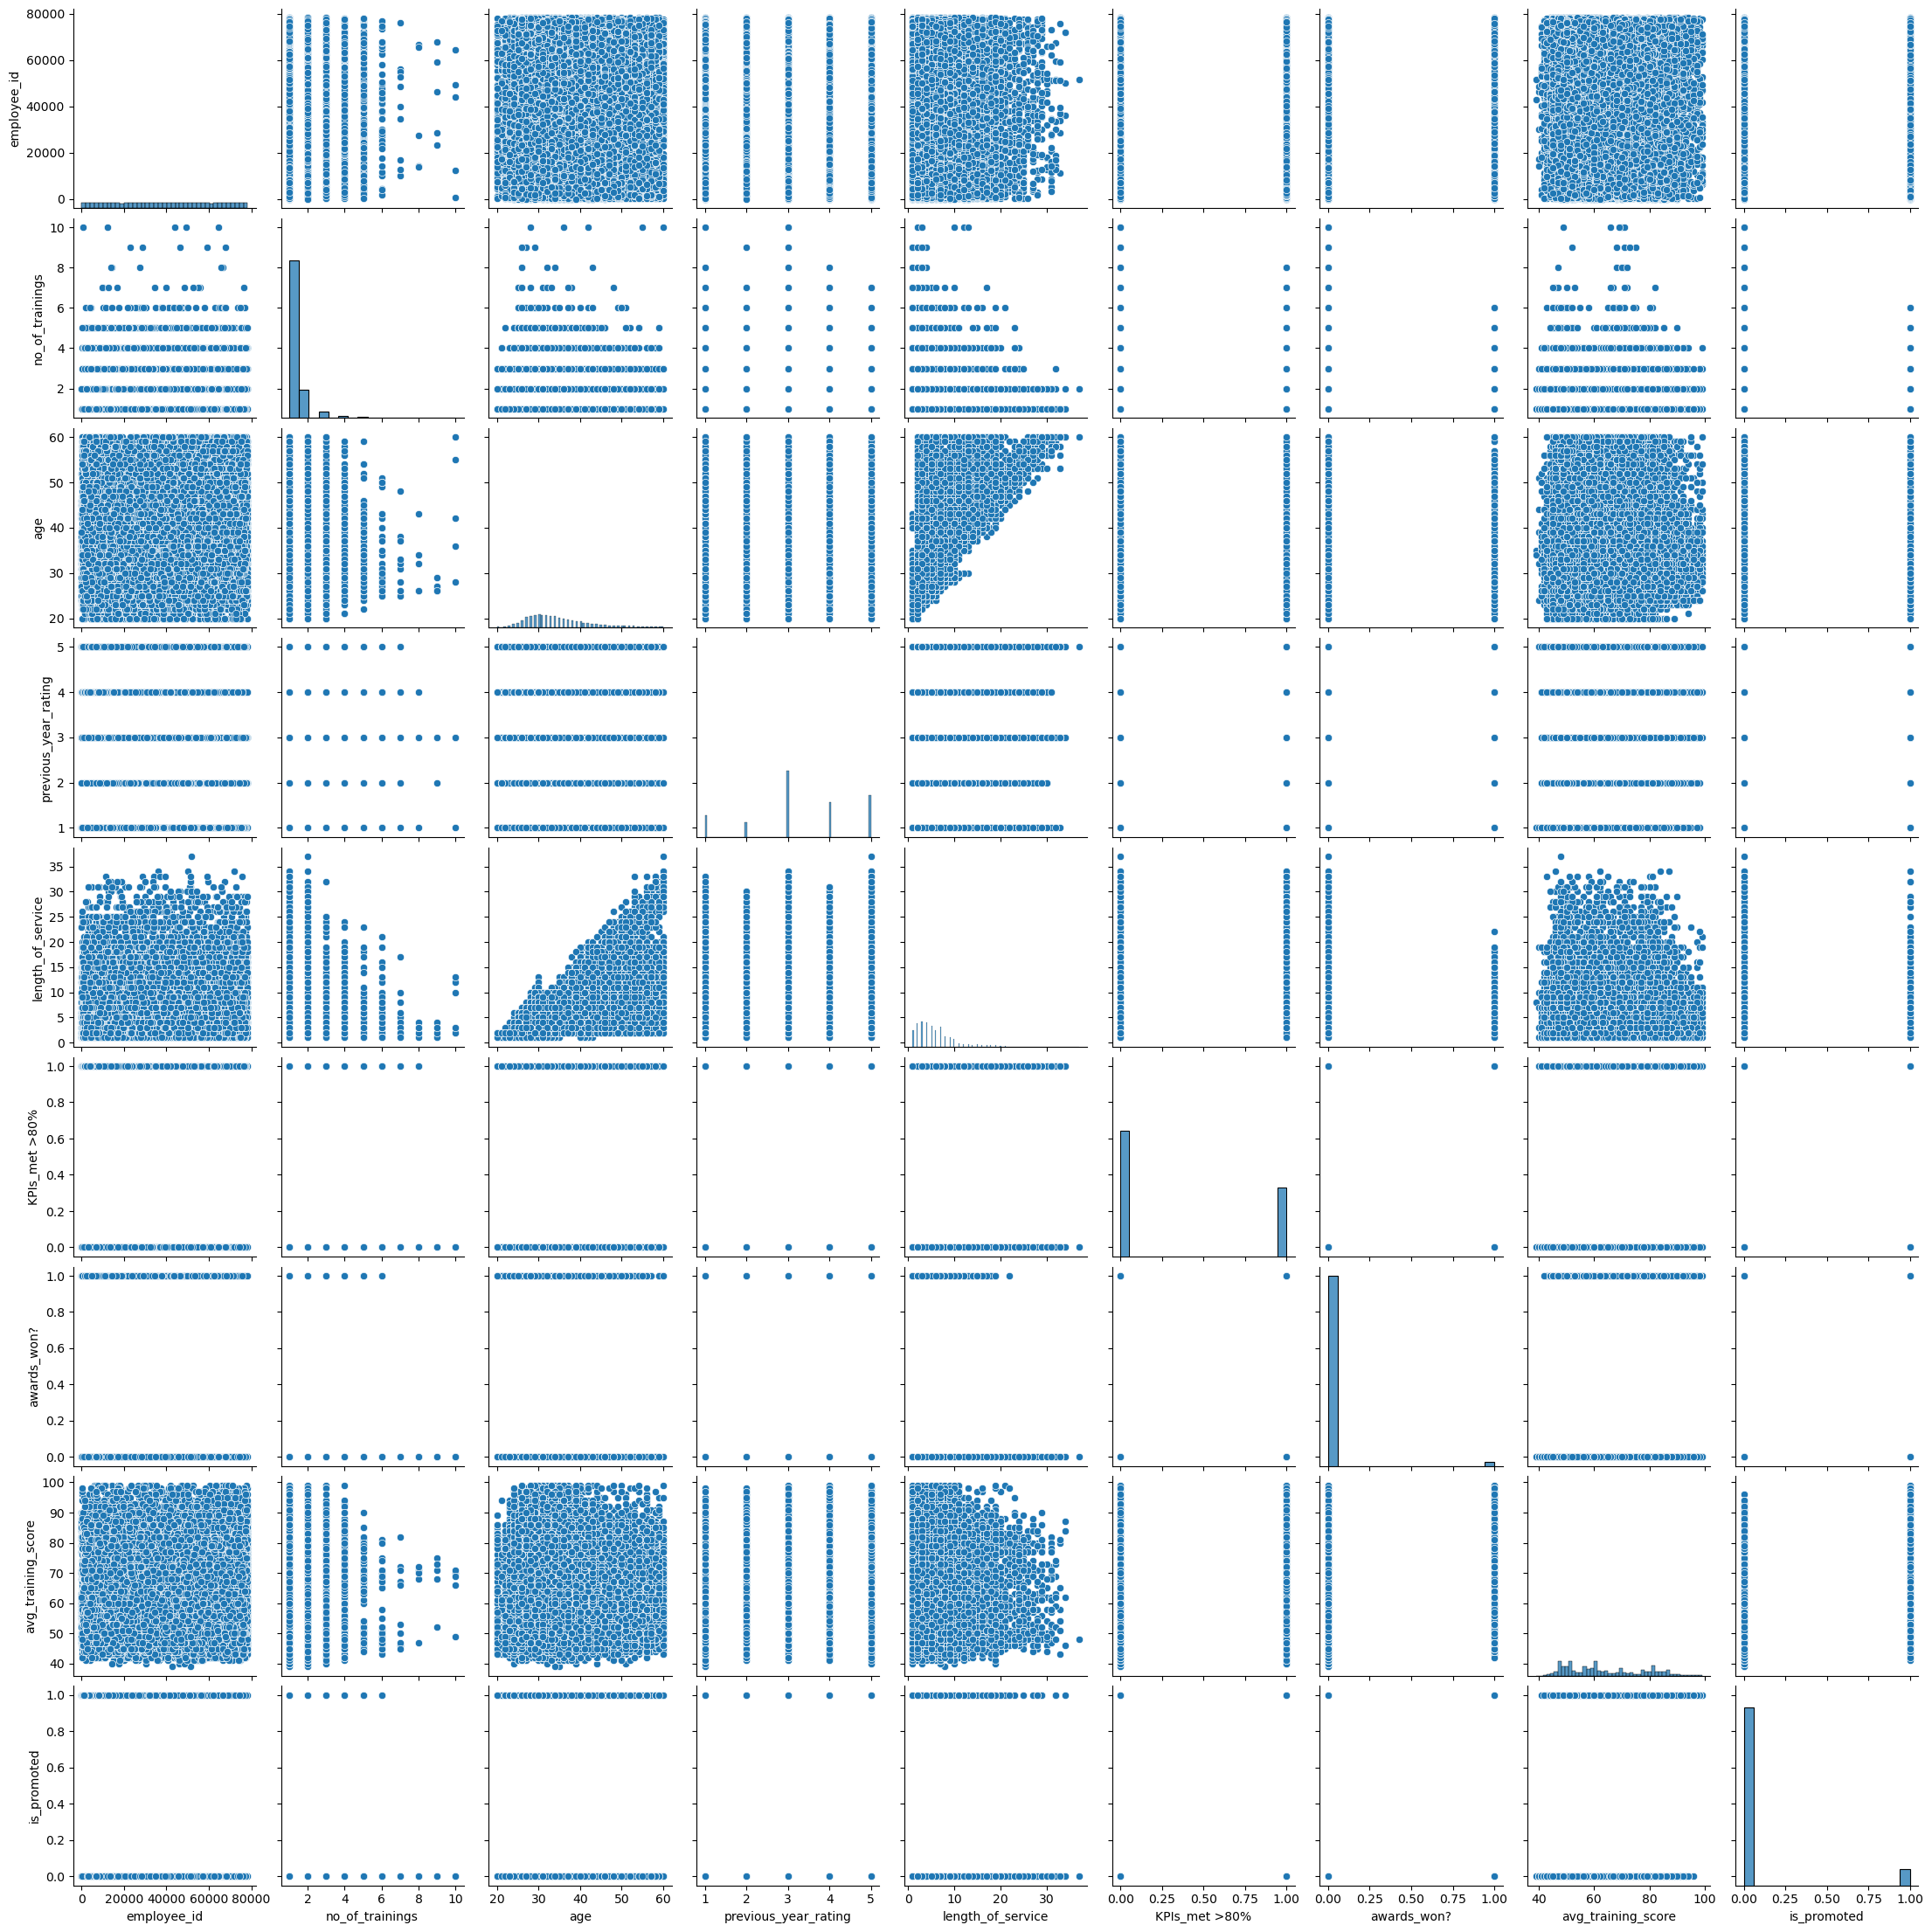

In [370]:
#Bivariate
plt.figure(figsize=(12,6))
sns.pairplot(train_df[num_col])

## Data Cleaning

        Check and Handling Missing values

In [371]:
# Impute missing values
train_df['education'].fillna(train_df['education'].mode()[0], inplace=True)
train_df['previous_year_rating'].fillna(train_df['previous_year_rating'].median(), inplace=True)

In [372]:
# check target data
train_df['education'].value_counts()

education
Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [373]:
train_df['previous_year_rating'].value_counts()

previous_year_rating
3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [374]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [375]:
# To check number of classes in is_promoted
train_df["is_promoted"].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [376]:
train_df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [377]:
# Let's classify the data based on is_promoted status
promoted = train_df[train_df["is_promoted"]==1];
not_promoted = train_df[train_df["is_promoted"]==0];

In [378]:
train_df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [379]:
# Univariate Analysis for numerical features
numerical_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 
                      'KPIs_met >80%', 'awards_won?', 'avg_training_score']

In [380]:
# Univariate Analysis for categorical features
categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel']

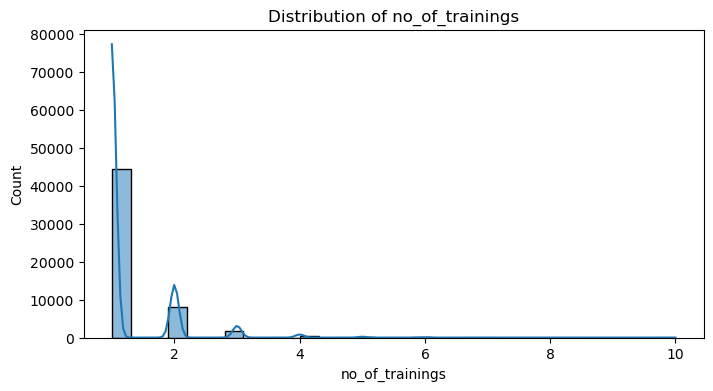

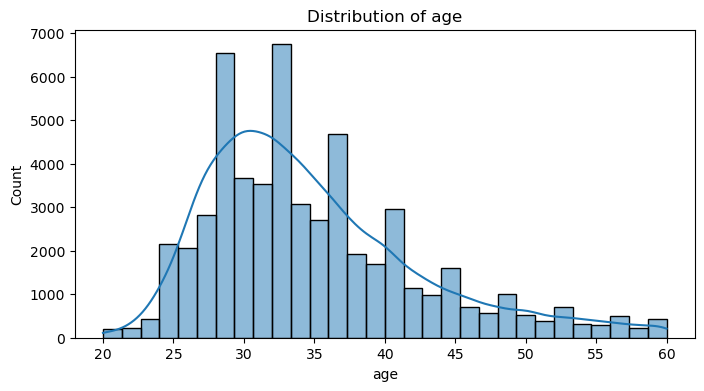

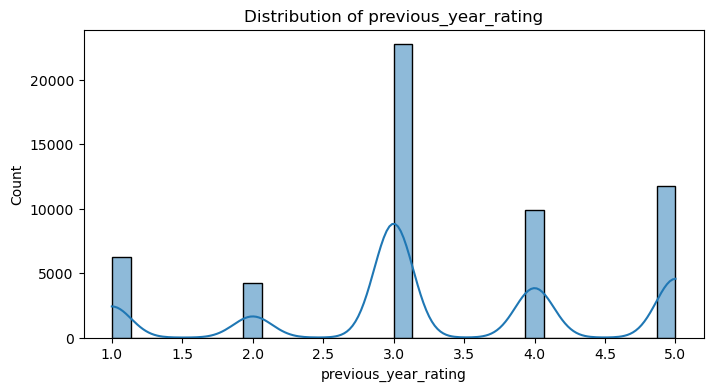

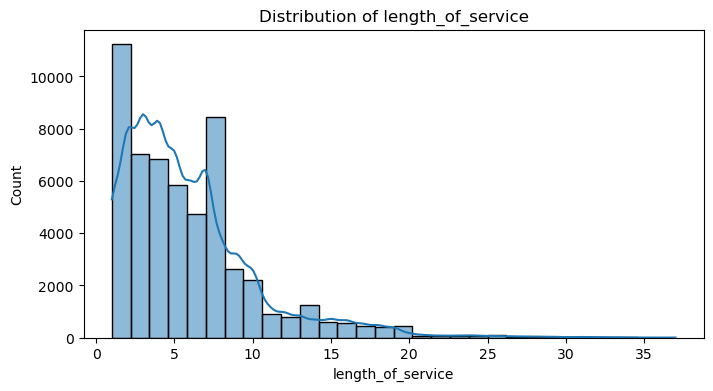

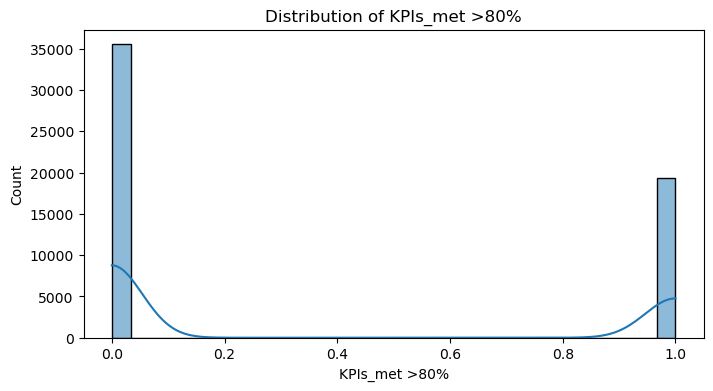

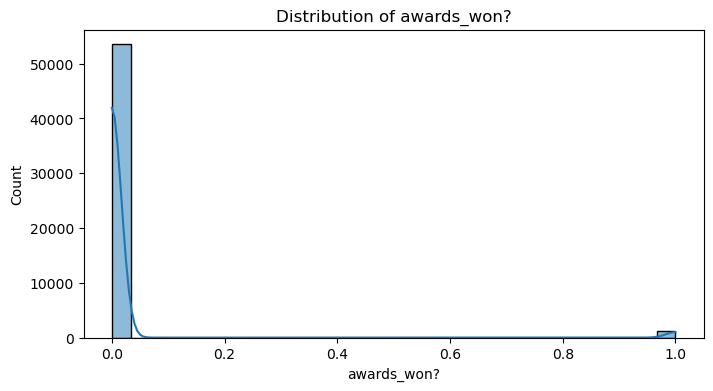

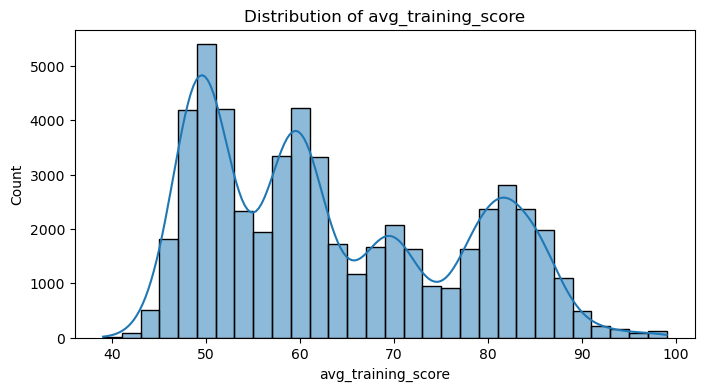

In [381]:
for feature in numerical_features:
    plt.figure(figsize=(8,4))
    sns.histplot(train_df[feature].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

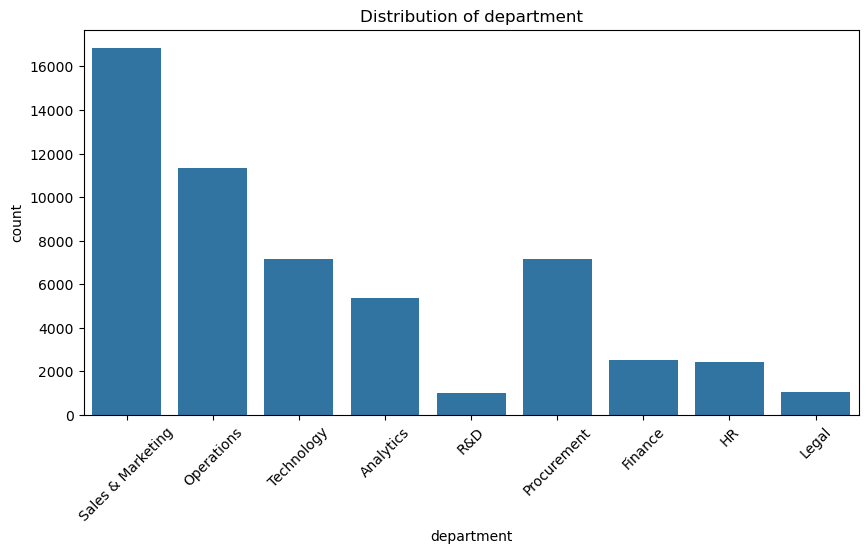

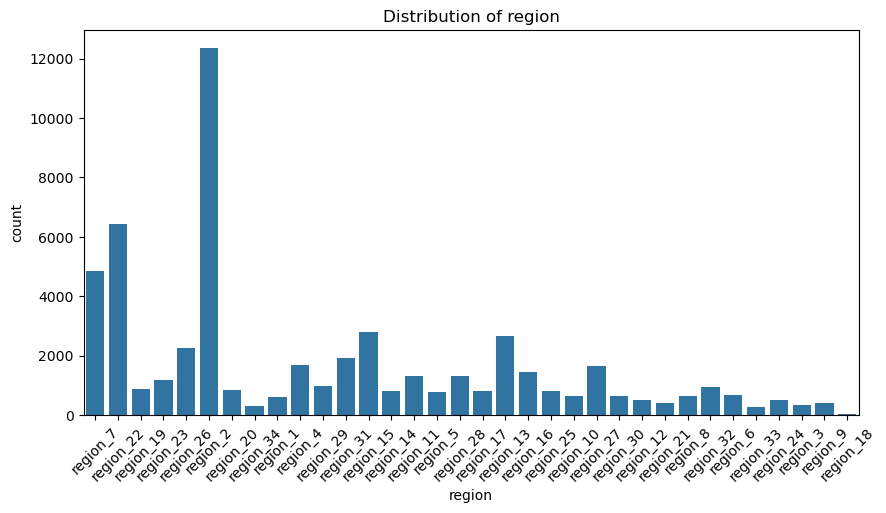

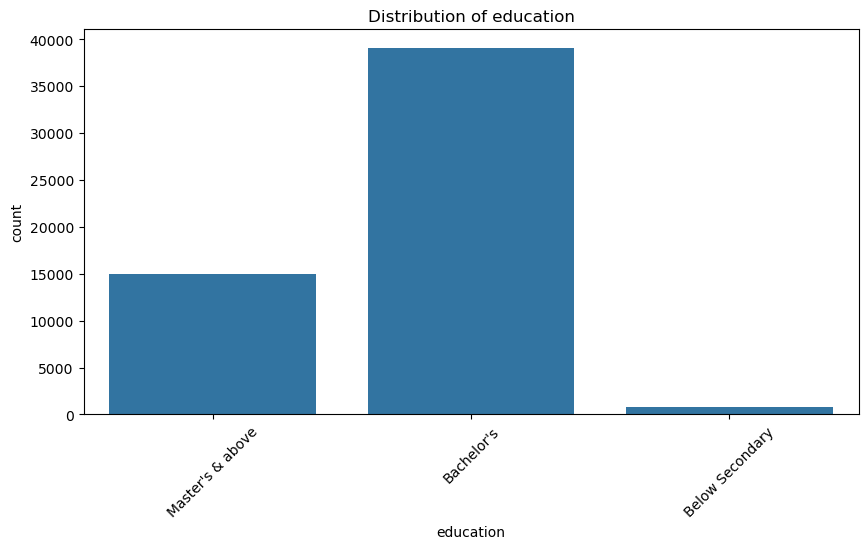

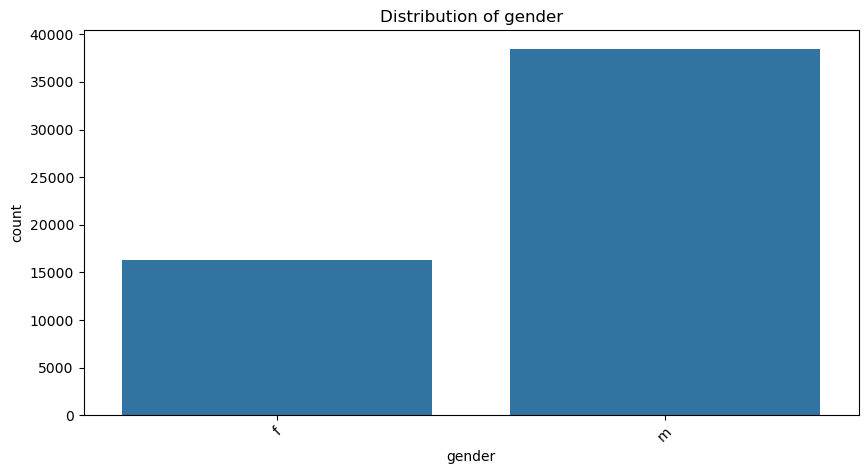

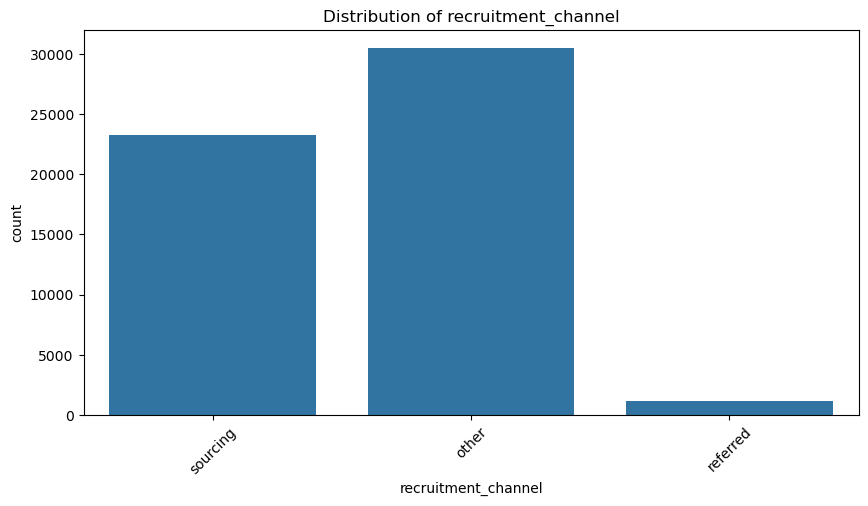

In [382]:
for feature in categorical_features:
    plt.figure(figsize=(10,5))
    sns.countplot(x=feature, data=train_df)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

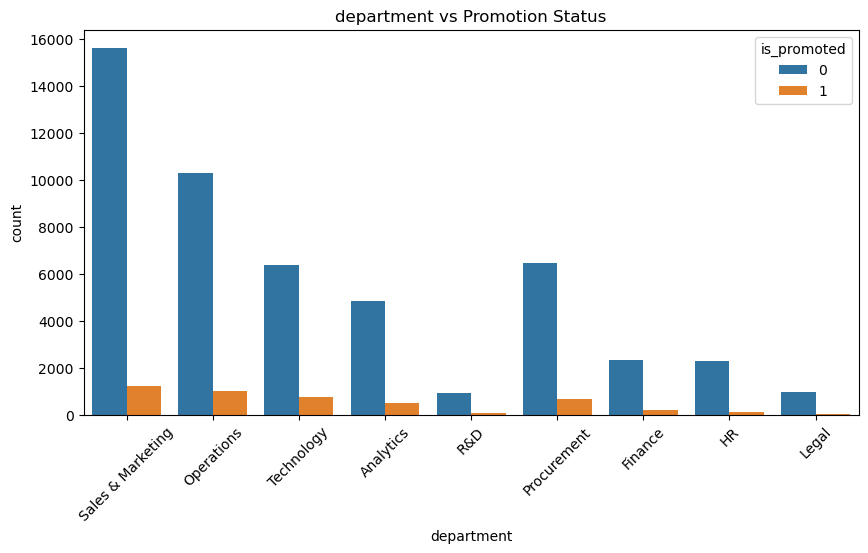

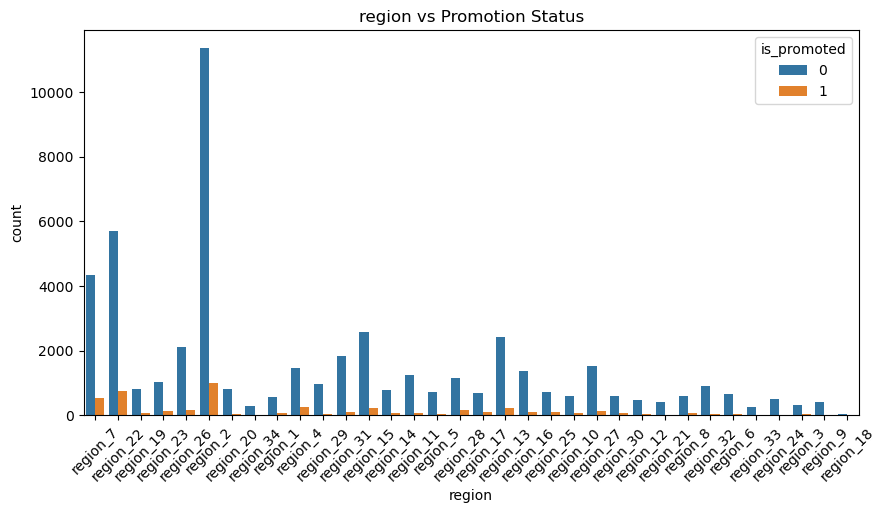

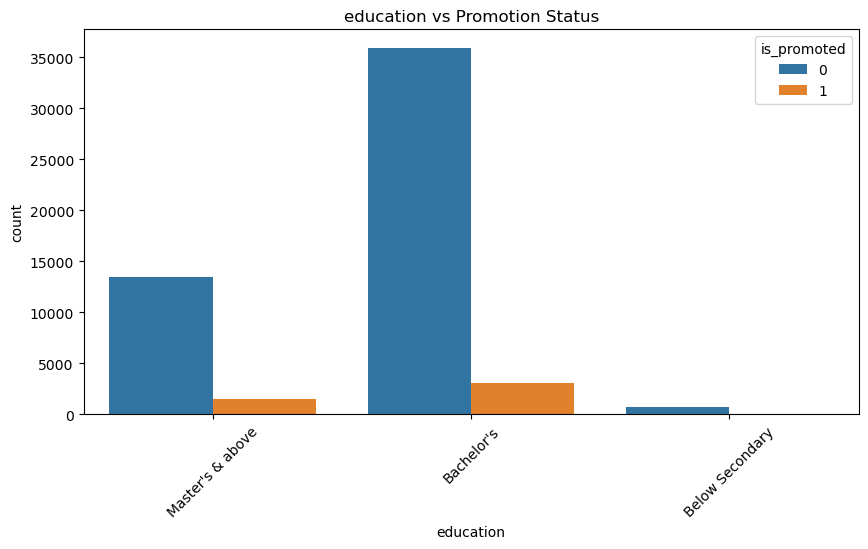

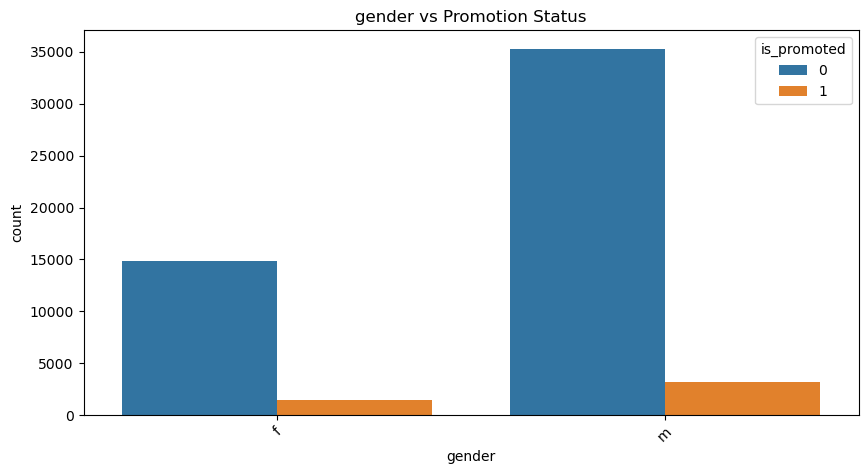

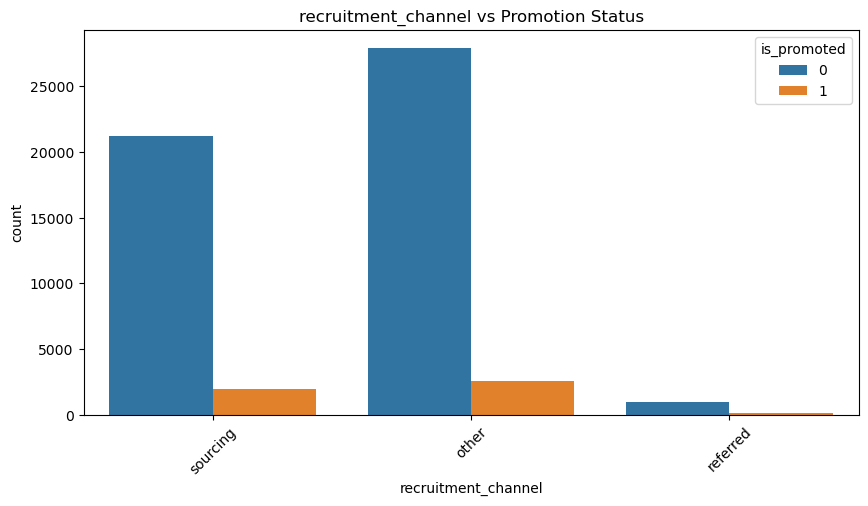

In [383]:
# Bivariate Analysis: Relationship between features and target variable
for feature in categorical_features:
    plt.figure(figsize=(10,5))
    sns.countplot(x=feature, hue='is_promoted', data=train_df)
    plt.title(f'{feature} vs Promotion Status')
    plt.xticks(rotation=45)
    plt.show()

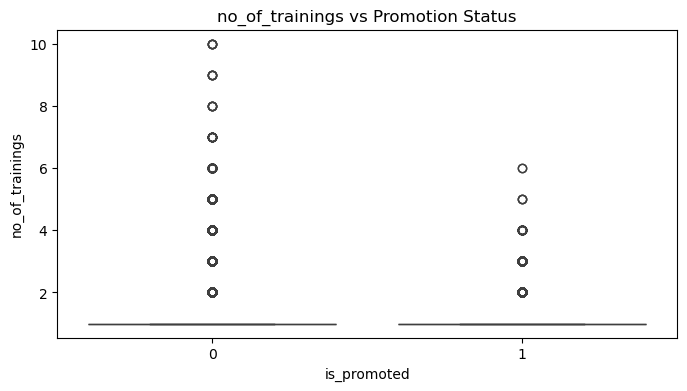

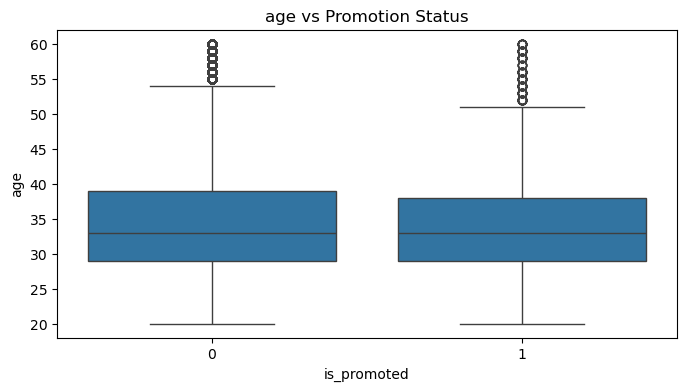

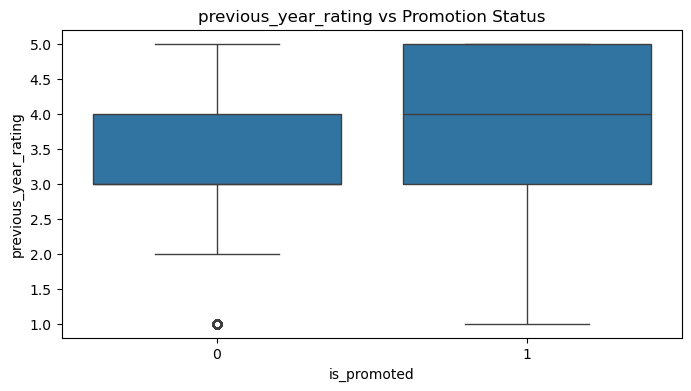

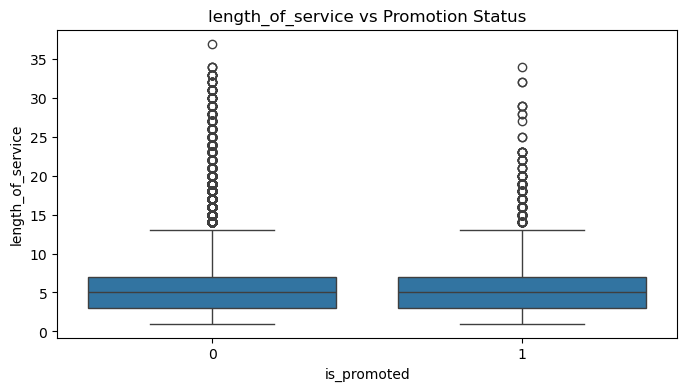

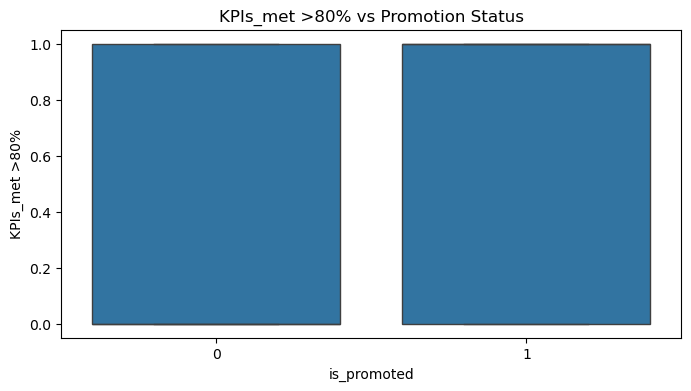

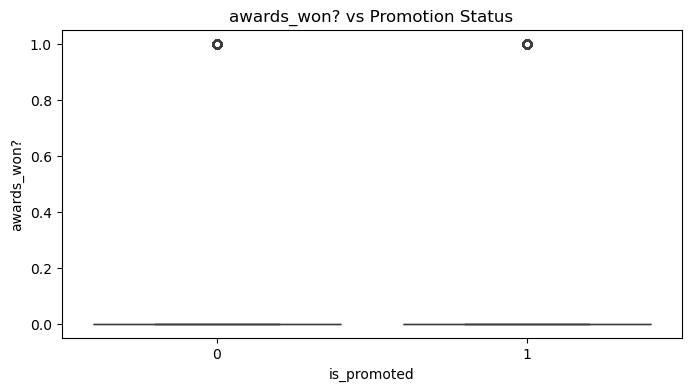

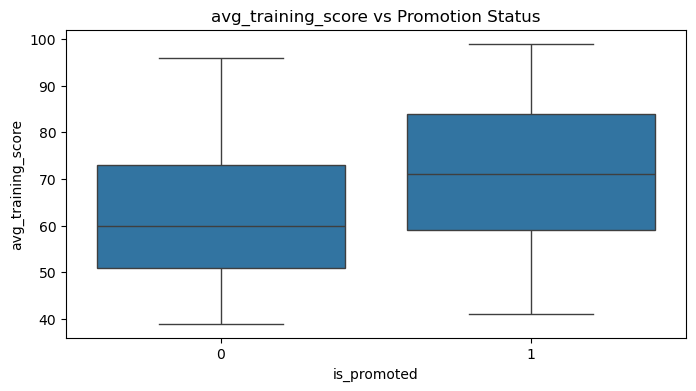

In [384]:
for feature in numerical_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='is_promoted', y=feature, data=train_df)
    plt.title(f'{feature} vs Promotion Status')
    plt.show()

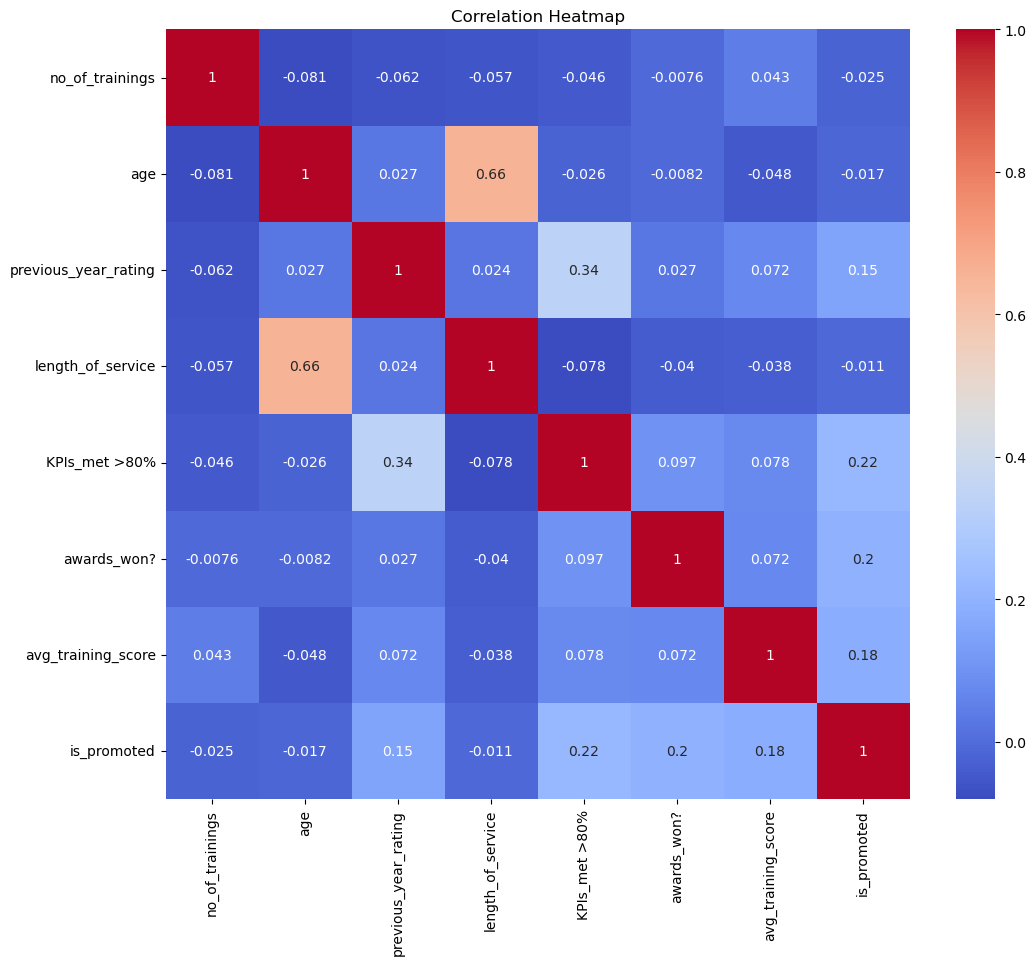

In [385]:
# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(train_df[numerical_features + ['is_promoted']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [386]:
# Impute missing values
train_df['education'].fillna(train_df['education'].mode()[0], inplace=True)
train_df['previous_year_rating'].fillna(train_df['previous_year_rating'].median(), inplace=True)

In [387]:
# check target data
train_df['education'].value_counts()

education
Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [388]:
train_df['previous_year_rating'].value_counts()

previous_year_rating
3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [389]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [390]:
# To check number of classes in is_promoted
train_df["is_promoted"].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [391]:
train_df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [392]:
# Function to detect outliers using IQR
def detect_outliers(feature):
    Q1 = train_df[feature].quantile(0.25)
    Q3 = train_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return train_df[(train_df[feature] < lower_bound) | (train_df[feature] > upper_bound)]


In [393]:
# Detect outliers in numerical features
for feature in numerical_features:
    outliers = detect_outliers(feature)
    print(f"\nNumber of outliers in {feature}: {outliers.shape[0]}")



Number of outliers in no_of_trainings: 10430

Number of outliers in age: 1435

Number of outliers in previous_year_rating: 6223

Number of outliers in length_of_service: 3489

Number of outliers in KPIs_met >80%: 0

Number of outliers in awards_won?: 1270

Number of outliers in avg_training_score: 0


In [394]:
# Depending on the business context, decide to remove or cap outliers
# Here, we'll cap the outliers at the 1st and 99th percentiles

for feature in numerical_features:
    lower_percentile = train_df[feature].quantile(0.01)
    upper_percentile = train_df[feature].quantile(0.99)
    train_df[feature] = np.where(train_df[feature] < lower_percentile, lower_percentile, train_df[feature])
    train_df[feature] = np.where(train_df[feature] > upper_percentile, upper_percentile, train_df[feature])


In [395]:
# Verify outliers after capping
for feature in numerical_features:
    outliers = detect_outliers(feature)
    print(f"Outliers in {feature} after capping: {outliers.shape[0]}")

Outliers in no_of_trainings after capping: 10430
Outliers in age after capping: 1435
Outliers in previous_year_rating after capping: 6223
Outliers in length_of_service after capping: 3489
Outliers in KPIs_met >80% after capping: 0
Outliers in awards_won? after capping: 1270
Outliers in avg_training_score after capping: 0


### EDA

In [410]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

from sklearn import set_config
set_config(display='diagram')

In [411]:
train_df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings         float64
age                     float64
previous_year_rating    float64
length_of_service       float64
KPIs_met >80%           float64
awards_won?             float64
avg_training_score      float64
is_promoted               int64
dtype: object

In [414]:
# separate category and numeric features

cat_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']

num_cols = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']


In [415]:
print(tgt_col, ign_cols, cat_cols, num_cols, sep='\n')

['is_promoted']
['employee_id']
['department', 'region', 'education', 'gender', 'recruitment_channel']
['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']


### Pipelining

In [416]:
# categorical preperation

cat_pipe_encode = Pipeline(
steps = [
    ('impute_cat', SimpleImputer(strategy='most_frequent')), # missing values
    ('ohe',OneHotEncoder(handle_unknown='ignore')) # categetoy encoding
])

In [417]:
# numerical features preperation

num_pipe_encode = Pipeline(
steps = [
    ('impute_num', SimpleImputer(strategy='median')), # missing values
    ('scale',StandardScaler()) # standard scaler
])

In [418]:
# map tranformation to features

preprocess = ColumnTransformer(
    transformers =[
        ('cat_encode',cat_pipe_encode,cat_cols),
        ('num_encode',num_pipe_encode,num_cols)
    ]
)

In [419]:
# integrate preprocessing and model

model_pipeline = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model',LogisticRegression())
])


In [420]:
# Model Building
X = train_df.drop(columns=ign_cols+tgt_col)
X.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,1.0,0.0,49.0
1,Operations,region_22,Bachelor's,m,other,1.0,30.0,5.0,4.0,0.0,0.0,60.0


In [421]:
y = train_df[tgt_col]
y.head(2)

,is_promoted
0,0
1,0


## train test split

In [731]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [732]:
train_X, val_X, train_y, val_y = train_test_split(X,y, 
                                         random_state=42, test_size=0.2)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((43846, 12), (10962, 12), (43846,), (10962,))

In [733]:
model_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression())])

In [734]:
# fit the model

model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression())])

In [735]:
# predict target with probability

model_pipeline.predict_proba(val_X)

array([[0.99365596, 0.00634404],
       [0.98698654, 0.01301346],
       [0.9614656 , 0.0385344 ],
       ...,
       [0.80909318, 0.19090682],
       [0.98702941, 0.01297059],
       [0.96735896, 0.03264104]])

In [736]:
model_pipeline.predict_proba(val_X)[:,0]

array([0.99365596, 0.98698654, 0.9614656 , ..., 0.80909318, 0.98702941,
       0.96735896])

In [737]:
model_pipeline.predict_proba(val_X)[:,1]

array([0.00634404, 0.01301346, 0.0385344 , ..., 0.19090682, 0.01297059,
       0.03264104])

In [738]:
# predict target 

model_pipeline.predict(val_X)


array([0, 0, 0, ..., 0, 0, 0])

In [797]:
# evaluation method

def model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline):
    
    predicted_train_tgt = model_pipeline.predict(train_X)
    predicted_val_tgt = model_pipeline.predict(val_X)
    
    print("Train Accuracy : ",accuracy_score(train_y, predicted_train_tgt),sep='\n')
    print("Test Accuracy : ",accuracy_score(test_y, predicted_val_tgt),sep='\n')

    print('Train AUC', roc_auc_score(train_y,predicted_train_tgt),sep='\n')
    print('Valid AUC', roc_auc_score(val_y,predicted_val_tgt),sep='\n')

    print('Train cnf_matrix', confusion_matrix(train_y,predicted_train_tgt),sep='\n')
    print('Valid cnf_matrix', confusion_matrix(val_y,predicted_val_tgt),sep='\n')

    print('Train cls_rep', classification_report(train_y,predicted_train_tgt),sep='\n')
    print('Valid cls rep', classification_report(val_y,predicted_val_tgt),sep='\n')
    
    print('Train f1 Score', f1_score(train_y,predicted_train_tgt),sep='\n')
    print('Test f1 Score', f1_score(val_y,predicted_val_tgt),sep='\n')

    # plot roc-auc
    y_pred_proba = model_pipeline.predict_proba(val_X)[:,1]
    plt.figure()
    fpr, tpr, thrsh = roc_curve(val_y,y_pred_proba)
    #roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr)
    plt.show()

Train Accuracy : 
0.9316699356839848
Test Accuracy : 
0.9318555008210181
Train AUC
0.6282274691859312
Valid AUC
0.6202149362604928
Train cnf_matrix
[[39865   221]
 [ 2775   985]]
Valid cnf_matrix
[[9991   63]
 [ 684  224]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     40086
           1       0.82      0.26      0.40      3760

    accuracy                           0.93     43846
   macro avg       0.88      0.63      0.68     43846
weighted avg       0.92      0.93      0.92     43846

Valid cls rep
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10054
           1       0.78      0.25      0.37       908

    accuracy                           0.93     10962
   macro avg       0.86      0.62      0.67     10962
weighted avg       0.92      0.93      0.92     10962

Train f1 Score
0.3966975432944019
Test f1 Score
0.37489539748953976


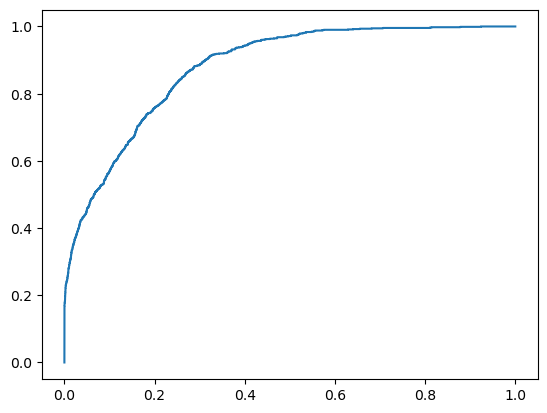

In [798]:
model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)

## Using GridSearch to hyper tune single model

In [741]:
# set the hyper parameters

params = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3],
    'model__solver':['saga']
    }    
]

In [742]:
# map the grid parameters with pipeline

grid = GridSearchCV(estimator=model_pipeline, param_grid=params, 
                    cv=2, scoring='roc_auc')

In [743]:
# fit the grid model

grid.fit(train_X, train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(...ian')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'KPIs_met '
                                                                          '>80%',
                                                                          'awards_won?',
                                                                          'avg_training_score'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression(C=0.5, solver='saga')],
                          'model__C': [0.5, 3], 'model__penalty': ['l2', None],
                          'model__solver': ['saga']}],
             scoring='roc_auc')

In [744]:
# get the best parameter

grid.best_params_

{'model': LogisticRegression(C=0.5, solver='saga'),
 'model__C': 0.5,
 'model__penalty': 'l2',
 'model__solver': 'saga'}

In [745]:
# show the grid results

res_df = pd.DataFrame(grid.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(C=0.5, solver='saga'), 'model__C': 0.5, 'model__penalty': 'l2', 'mo...",0.872781,1
1,"{'model': LogisticRegression(C=0.5, solver='saga'), 'model__C': 0.5, 'model__penalty': None, 'mo...",NaN,3
2,"{'model': LogisticRegression(C=0.5, solver='saga'), 'model__C': 3, 'model__penalty': 'l2', 'mode...",0.870025,2
3,"{'model': LogisticRegression(C=0.5, solver='saga'), 'model__C': 3, 'model__penalty': None, 'mode...",NaN,4


In [746]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

In [747]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [749]:
sub = pd.read_csv('wns_analytics_dataset/sample_submission_wns_analytics.csv')
sub['is_promoted'] = model_pipeline.predict(test)
sub.to_csv('wns_analytics_submission.csv',index=False)

In [750]:
sub = pd.read_csv('wns_analytics_dataset/sample_submission_wns_analytics.csv')
sub.head(3)

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0


### Sample submission without modeling

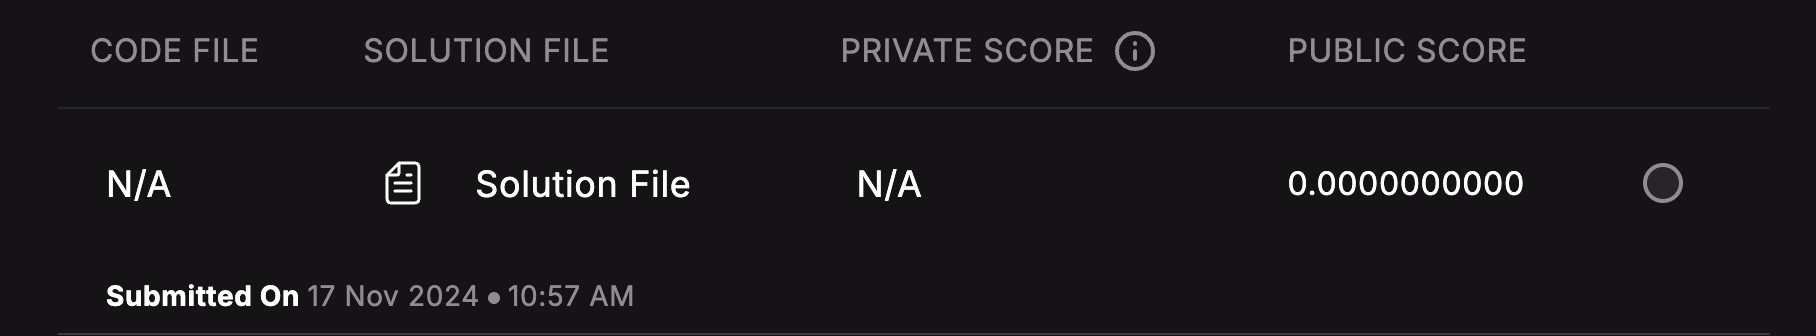

In [751]:
test.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47


In [752]:
train_df.columns.difference(test.columns)

Index(['is_promoted'], dtype='object')

In [753]:
# updating the existing target values with predicted values
sub['is_promoted'] = model_pipeline.predict(test)

In [754]:
sub.to_csv('wns_analytics_dataset/sub_1.csv',index=False)

In [755]:
sub

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


### Submission of sub_1.csv

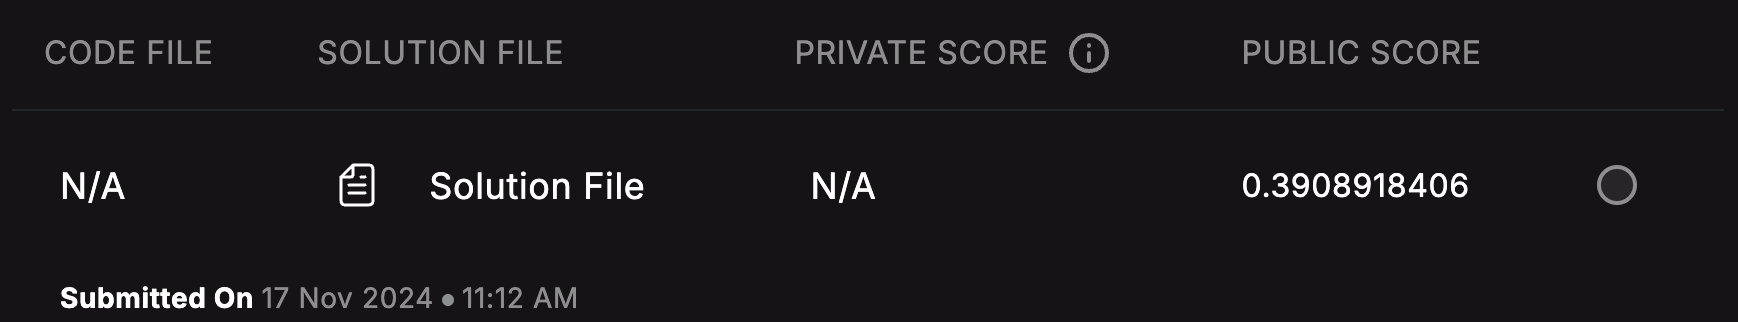

### pickling the model

In [756]:
import joblib

In [757]:
joblib.dump(model_pipeline,'wns_analytics_dataset/wns_pipeline_model.pkl')

['wns_analytics_dataset/wns_pipeline_model.pkl']

### perform oversampling to balance the dataset

In [758]:
from imblearn.over_sampling import RandomOverSampler

In [759]:
over_sampling = RandomOverSampler()

In [760]:
train_y.value_counts()

is_promoted
0    40086
1     3760
Name: count, dtype: int64

In [761]:
train_X_os, train_y_os = over_sampling.fit_resample(train_X,train_y)

In [762]:
train_y_os.value_counts()

is_promoted
0    40086
1    40086
Name: count, dtype: int64

In [763]:
from sklearn.tree import DecisionTreeClassifier

### Using GridSearch to hyper tune multi model

In [764]:
params_2 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3],
    'model__solver':['saga']
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[10,15,20],
    'model__criterion':['gini'],
    'model__max_features':['sqrt']    
    }
]


In [765]:
params_2

[{'model': [LogisticRegression()],
  'model__penalty': ['l2', None],
  'model__C': [0.5, 3],
  'model__solver': ['saga']},
 {'model': [DecisionTreeClassifier()],
  'model__max_depth': [10, 15, 20],
  'model__criterion': ['gini'],
  'model__max_features': ['sqrt']}]

In [766]:
grid_2 = GridSearchCV(estimator=model_pipeline, param_grid=params_2, 
                    cv=2, scoring='f1')

In [767]:
grid_2.fit(train_X_os, train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(...
                                                                          'awards_won?',
                                                                          'avg_training_score'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None],
                          'model__solver': ['saga']},
                         {'model': [DecisionTreeClassifier(max_depth=20,
                                                           max_features='sqrt')],
                          'model__criterion': ['gini'],
                          'model__max_depth': [10, 15, 20],
                          'model__max_features': ['sqrt']}],
             scoring='f1')

In [768]:
grid_2

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(...
                                                                          'awards_won?',
                                                                          'avg_training_score'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None],
                          'model__solver': ['saga']},
                         {'model': [DecisionTreeClassifier(max_depth=20,
                                                           max_features='sqrt')],
                          'model__criterion': ['gini'],
                          'model__max_depth': [10, 15, 20],
                          'model__max_features': ['sqrt']}],
             scoring='f1')

In [769]:
grid_2.best_params_

{'model': DecisionTreeClassifier(max_depth=20, max_features='sqrt'),
 'model__criterion': 'gini',
 'model__max_depth': 20,
 'model__max_features': 'sqrt'}

In [770]:
grid_2.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=20, max_features='sqrt'))])

In [771]:
grid_2.cv_results_

{'mean_fit_time': array([0.36138546, 0.0859617 , 0.61283088, 0.08113885, 0.11838758,
        0.16615844, 0.19731295]),
 'std_fit_time': array([0.01797259, 0.00102746, 0.01977491, 0.00058913, 0.00641954,
        0.00673747, 0.00156081]),
 'mean_score_time': array([0.05767262, 0.        , 0.054793  , 0.        , 0.05432189,
        0.05471408, 0.05575657]),
 'std_score_time': array([0.00105345, 0.        , 0.00189698, 0.        , 0.00017321,
        0.00079095, 0.00012636]),
 'param_model': masked_array(data=[LogisticRegression(), LogisticRegression(),
                    LogisticRegression(), LogisticRegression(),
                    DecisionTreeClassifier(max_depth=20, max_features='sqrt'),
                    DecisionTreeClassifier(max_depth=20, max_features='sqrt'),
                    DecisionTreeClassifier(max_depth=20, max_features='sqrt')],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_model__C': 

In [772]:
new_model = grid_2.best_estimator_

Train Accuracy : 
0.8224923596223145
Test Accuracy : 
0.7776865535486225
Train AUC
0.8408608658936477
Valid AUC
0.6849448002811251
Train cnf_matrix
[[32818  7268]
 [  515  3245]]
Valid cnf_matrix
[[8004 2050]
 [ 387  521]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     40086
           1       0.31      0.86      0.45      3760

    accuracy                           0.82     43846
   macro avg       0.65      0.84      0.67     43846
weighted avg       0.93      0.82      0.86     43846

Valid cls rep
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     10054
           1       0.20      0.57      0.30       908

    accuracy                           0.78     10962
   macro avg       0.58      0.68      0.58     10962
weighted avg       0.89      0.78      0.82     10962

Train f1 Score
0.45470468717158274
Test f1 Score
0.2995113538373096


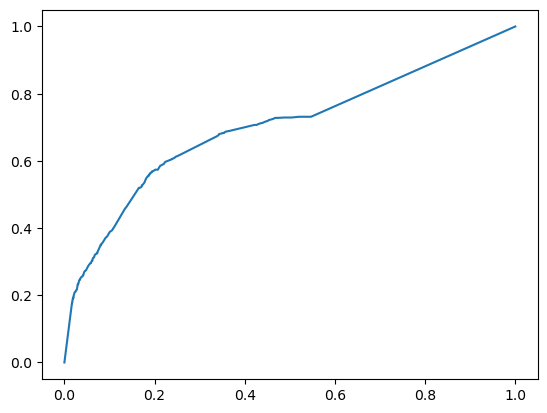

In [773]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model)

Train Accuracy : 
0.8436486553909095
Test Accuracy : 
0.7776865535486225
Train AUC
0.8436486553909096
Valid AUC
0.6849448002811251
Train cnf_matrix
[[32818  7268]
 [ 5267 34819]]
Valid cnf_matrix
[[8004 2050]
 [ 387  521]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     40086
           1       0.83      0.87      0.85     40086

    accuracy                           0.84     80172
   macro avg       0.84      0.84      0.84     80172
weighted avg       0.84      0.84      0.84     80172

Valid cls rep
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     10054
           1       0.20      0.57      0.30       908

    accuracy                           0.78     10962
   macro avg       0.58      0.68      0.58     10962
weighted avg       0.89      0.78      0.82     10962

Train f1 Score
0.8474559770240834
Test f1 Score
0.2995113538373096


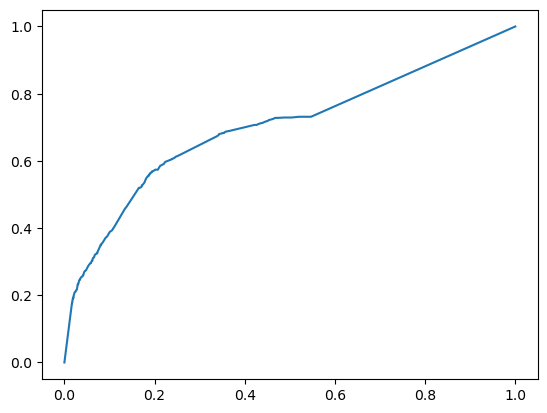

In [774]:
model_train_val_eval(train_X_os,val_X,train_y_os,val_y,new_model)

In [775]:
res_df_2 = pd.DataFrame(grid_2.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df_2[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2', 'model__solver': 'saga'}",0.793102,2
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None, 'model__solver': 'saga'}",NaN,6
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2', 'model__solver': 'saga'}",0.793087,3
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None, 'model__solver': 'saga'}",NaN,7
4,"{'model': DecisionTreeClassifier(max_depth=20, max_features='sqrt'), 'model__criterion': 'gini',...",0.689596,5
5,"{'model': DecisionTreeClassifier(max_depth=20, max_features='sqrt'), 'model__criterion': 'gini',...",0.782902,4
6,"{'model': DecisionTreeClassifier(max_depth=20, max_features='sqrt'), 'model__criterion': 'gini',...",0.854112,1


In [776]:
# updating the existing target values with predicted values
sub['is_promoted'] = new_model.predict(test)
sub.to_csv('wns_analytics_dataset/sub_2.csv',index=False)

In [777]:
sub.head(3)

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0


### result uploaded in the analytics vidhya website and the recieved score

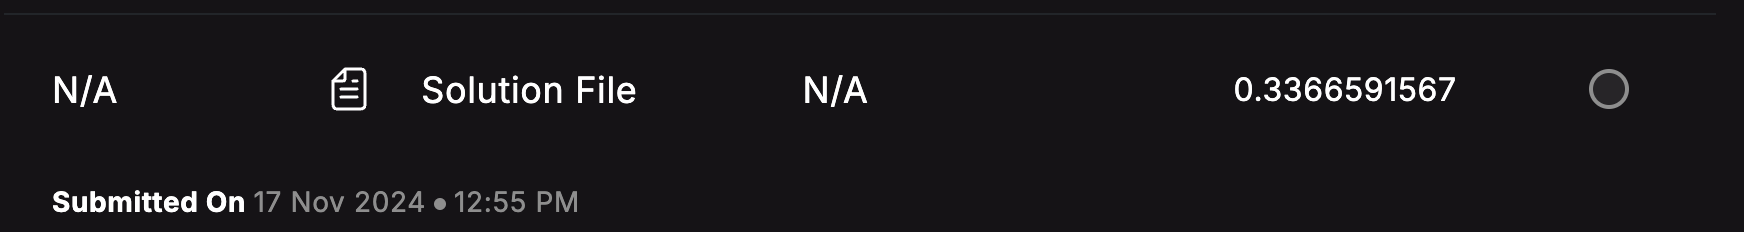

### Using GridSearch to hyper tune multi model along with ensembling

In [778]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier, StackingClassifier, VotingClassifier

In [779]:
import xgboost as xgb

pip install xgboost

In [665]:
params_3 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3],
    'model__solver':['saga']
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[10,15,20],
    'model__criterion':['gini'],
    'model__max_features':['sqrt']    
    },
    {
    'model': [StackingClassifier(
    estimators=[
        ['sclf1',RandomForestClassifier()],
        ['sclf2',GradientBoostingClassifier()],
        ['sclf3',AdaBoostClassifier()],],   
        final_estimator=LogisticRegression(penalty='elasticnet',solver='saga', l1_ratio=0.5)

    )],
    'model__sclf1__max_depth':[10,20],
    'model__sclf2__n_estimators':[100,200],    
    'model__sclf3__n_estimators':[150,200],    
    }

]



In [666]:
grid_3 = GridSearchCV(estimator=model_pipeline, param_grid=params_3, 
                    cv=2, scoring='f1')

In [667]:
grid_3.fit(train_X_os, train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(...
                         {'model': [StackingClassifier(estimators=[['sclf1',
                                                                    RandomForestClassifier(max_depth=20)],
                                                                   ['sclf2',
                                                                    GradientBoostingClassifier()],
                                                                   ['sclf3',
                                                                    AdaBoostClassifier(n_estimators=200)]],
                                                       final_estimator=LogisticRegression(l1_ratio=0.5,
                                                                                          penalty='elasticnet',
                                                                                          solver='saga'))],
                          'model__sclf1__max_depth': [10, 20],
                          'model__sclf2__n_estimators': [100, 200],
                          'model__sclf3__n_estimators': [150, 200]}],
             scoring='f1')

In [668]:
grid_3.best_params_

{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=20)],
                                ['sclf2', GradientBoostingClassifier()],
                                ['sclf3', AdaBoostClassifier(n_estimators=200)]],
                    final_estimator=LogisticRegression(l1_ratio=0.5,
                                                       penalty='elasticnet',
                                                       solver='saga')),
 'model__sclf1__max_depth': 20,
 'model__sclf2__n_estimators': 100,
 'model__sclf3__n_estimators': 200}

In [669]:
grid_3.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale'...
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model',
                 StackingClassifier(estimators=[['sclf1',
                                                 RandomForestClassifier(max_depth=20)],
                                                ['sclf2',
                                                 GradientBoostingClassifier()],
                                                ['sclf3',
                                                 AdaBoostClassifier(n_estimators=200)]],
                                    final_estimator=LogisticRegression(l1_ratio=0.5,
                                                                       penalty='elasticnet',
                                                                       solver='saga')))])

In [670]:
new_model_3 = grid_3.best_estimator_

Train Accuracy : 
0.9868631118003923
Test Accuracy : 
0.9106002554278416
Train AUC
0.9869106752928013
Valid AUC
0.6286646820823938
Train cnf_matrix
[[39559   527]
 [   49  3711]]
Valid cnf_matrix
[[9718  336]
 [ 644  264]]
Train cls_rep
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     40086
           1       0.88      0.99      0.93      3760

    accuracy                           0.99     43846
   macro avg       0.94      0.99      0.96     43846
weighted avg       0.99      0.99      0.99     43846

Valid cls rep
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10054
           1       0.44      0.29      0.35       908

    accuracy                           0.91     10962
   macro avg       0.69      0.63      0.65     10962
weighted avg       0.90      0.91      0.90     10962

Train f1 Score
0.9279819954988746
Test f1 Score
0.35013262599469497


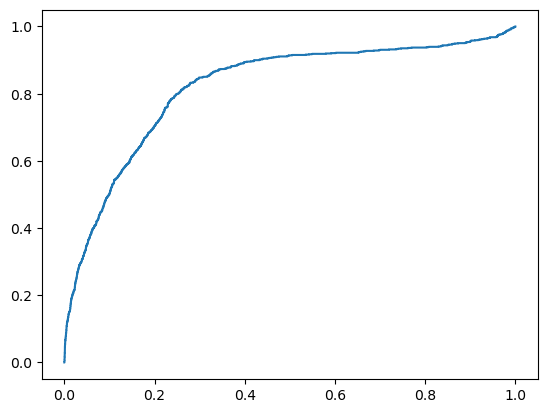

In [671]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model_3)

In [672]:
res_df_3 = pd.DataFrame(grid_3.cv_results_,)
pd.set_option('display.max_colwidth',500)
res_df_3[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2', 'model__solver': 'saga'}",0.792978,12
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None, 'model__solver': 'saga'}",NaN,14
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2', 'model__solver': 'saga'}",0.793226,11
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None, 'model__solver': 'saga'}",NaN,15
4,"{'model': DecisionTreeClassifier(), 'model__criterion': 'gini', 'model__max_depth': 10, 'model__max_features': 'sqrt'}",0.748047,13
5,"{'model': DecisionTreeClassifier(), 'model__criterion': 'gini', 'model__max_depth': 15, 'model__max_features': 'sqrt'}",0.812637,10
6,"{'model': DecisionTreeClassifier(), 'model__criterion': 'gini', 'model__max_depth': 20, 'model__max_features': 'sqrt'}",0.846185,7
7,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=20)], ['sclf2', GradientBoostingClassifier()], ['sclf3', AdaBoostClassifier(n_estimators=200)]], final_estimator=LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')), 'model__sclf1__max_depth': 10, 'model_...",0.840180,9
8,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=20)], ['sclf2', GradientBoostingClassifier()], ['sclf3', AdaBoostClassifier(n_estimators=200)]], final_estimator=LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')), 'model__sclf1__max_depth': 10, 'model_...",0.840403,8
9,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=20)], ['sclf2', GradientBoostingClassifier()], ['sclf3', AdaBoostClassifier(n_estimators=200)]], final_estimator=LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')), 'model__sclf1__max_depth': 10, 'model_...",0.847538,5


In [780]:
# updating the existing target values with predicted values
sub['is_promoted'] = new_model_3.predict(test)
sub.to_csv('wns_analytics_dataset/sub_3.csv',index=False)

In [781]:
sub.head(3)

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0


### result uploaded in the analytics vidhya website and the recieved score

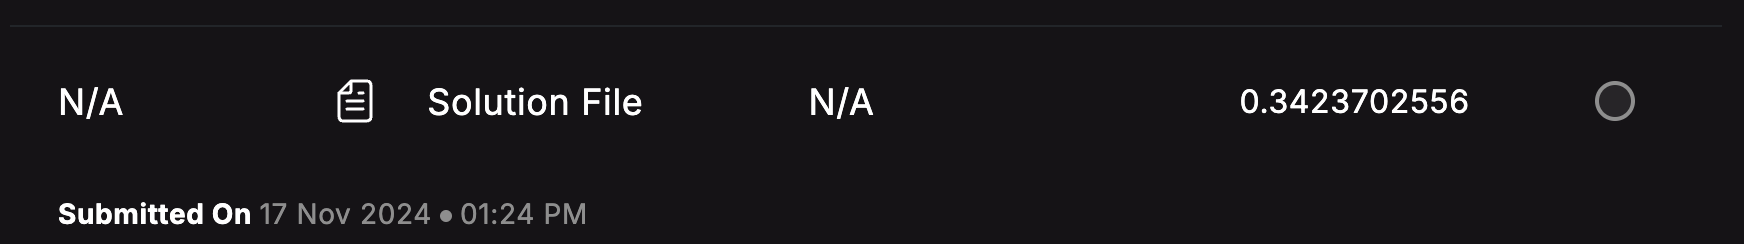

In [782]:
joblib.dump(new_model_3,'wns_analytics_dataset/wns_pipeline_model.pkl')

['wns_analytics_dataset/wns_pipeline_model.pkl']

In [783]:
train_df.iloc[0]

employee_id                         65438
department              Sales & Marketing
region                           region_7
education                Master's & above
gender                                  f
recruitment_channel              sourcing
no_of_trainings                       1.0
age                                  35.0
previous_year_rating                  5.0
length_of_service                     8.0
KPIs_met >80%                         1.0
awards_won?                           0.0
avg_training_score                   49.0
is_promoted                             0
Name: 0, dtype: object

### Using GridSearch to hyper tune multi model along with ensembling

In [710]:
params_4 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3],
    'model__solver':['saga']
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[10,15,20],
    'model__criterion':['gini'],
    'model__max_features':['sqrt']    
    },
    {
    'model': [RandomForestClassifier()],
    'model__max_depth':[None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__max_features':[None, 'sqrt', 'log2']
    },
    {
    'model': [StackingClassifier(
    estimators=[
        ['sclf1',RandomForestClassifier()],
        ['sclf2',GradientBoostingClassifier()],
        ['sclf3',AdaBoostClassifier()],
        ['sclf4',xgb.XGBClassifier(eval_metric='f1')],],
        final_estimator=LogisticRegression(penalty='elasticnet',solver='saga', l1_ratio=0.5)

    )],
    'model__sclf1__max_depth':[None, 10, 20, 30],
    'model__sclf2__n_estimators':[15,25],    
    'model__sclf3__n_estimators':[5,35],
    'model__sclf4__n_estimators':[50, 100, 150],
    }

]

In [711]:
grid_4 = GridSearchCV(estimator=model_pipeline, param_grid=params_4, 
                    cv=5, scoring='f1', n_jobs=-1, verbose=2)

In [712]:
grid_4.fit(train_X_os, train_y_os)

Fitting 5 folds for each of 91 candidates, totalling 455 fits


/Users/suhaibmohamed/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/suhaibmohamed/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/suhaibmohamed/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/suhaibmohamed/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (vers

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(...
                                                                                  multi_strategy=None,
                                                                                  n_estimators=None,
                                                                                  n_jobs=None,
                                                                                  num_parallel_tree=None,
                                                                                  random_state=None, ...)]],
                                                       final_estimator=LogisticRegression(l1_ratio=0.5,
                                                                                          penalty='elasticnet',
                                                                                          solver='saga'))],
                          'model__sclf1__max_depth': [None, 10, 20, 30],
                          'model__sclf2__n_estimators': [15, 25],
                          'model__sclf3__n_estimators': [5, 35],
                          'model__sclf4__n_estimators': [50, 100, 150]}],
             scoring='f1', verbose=2)

In [713]:
grid_4.best_params_

{'model': RandomForestClassifier(max_features='sqrt'),
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__min_samples_split': 2}

In [714]:
grid_4.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model', RandomForestClassifier(max_features='sqrt'))])

In [715]:
new_model_4 = grid_4.best_estimator_

Train Accuracy : 
0.9997035077316061
Test Accuracy : 
0.9278416347381865
Train AUC
0.9998378486254553
Valid AUC
0.6676187573885161
Train cnf_matrix
[[40073    13]
 [    0  3760]]
Valid cnf_matrix
[[9848  206]
 [ 585  323]]
Train cls_rep
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40086
           1       1.00      1.00      1.00      3760

    accuracy                           1.00     43846
   macro avg       1.00      1.00      1.00     43846
weighted avg       1.00      1.00      1.00     43846

Valid cls rep
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10054
           1       0.61      0.36      0.45       908

    accuracy                           0.93     10962
   macro avg       0.78      0.67      0.71     10962
weighted avg       0.92      0.93      0.92     10962

Train f1 Score
0.9982742599230056
Test f1 Score
0.4495476687543493


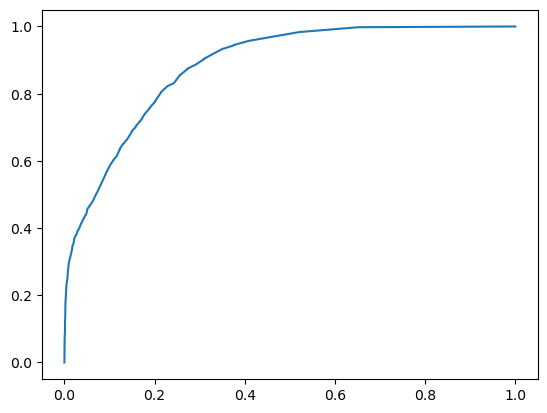

In [716]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model_4)

In [717]:
res_df_4 = pd.DataFrame(grid_4.cv_results_,)
pd.set_option('display.max_colwidth',500)
res_df_4[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2', 'model__solver': 'saga'}",0.792555,40
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None, 'model__solver': 'saga'}",NaN,68
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2', 'model__solver': 'saga'}",0.792717,39
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None, 'model__solver': 'saga'}",NaN,69
4,"{'model': DecisionTreeClassifier(), 'model__criterion': 'gini', 'model__max_depth': 10, 'model__max_features': 'sqrt'}",0.739406,41
...,...,...,...
86,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ['sclf2', GradientBoostingClassifier()], ['sclf3', AdaBoostClassifier()], ['sclf4', XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, ...",NaN,61
87,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ['sclf2', GradientBoostingClassifier()], ['sclf3', AdaBoostClassifier()], ['sclf4', XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, ...",NaN,63
88,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ['sclf2', GradientBoostingClassifier()], ['sclf3', AdaBoostClassifier()], ['sclf4', XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, ...",NaN,62
89,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ['sclf2', GradientBoostingClassifier()], ['sclf3', AdaBoostClassifier()], ['sclf4', XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, ...",NaN,72


In [784]:
# updating the existing target values with predicted values
sub['is_promoted'] = new_model_4.predict(test)
sub.to_csv('wns_analytics_dataset/sub_4.csv',index=False)

In [785]:
sub.head(3)

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0


In [786]:
new_model_4.predict(test)

array([0, 0, 0, ..., 0, 0, 1])

### result uploaded in the analytics vidhya website and the recieved score

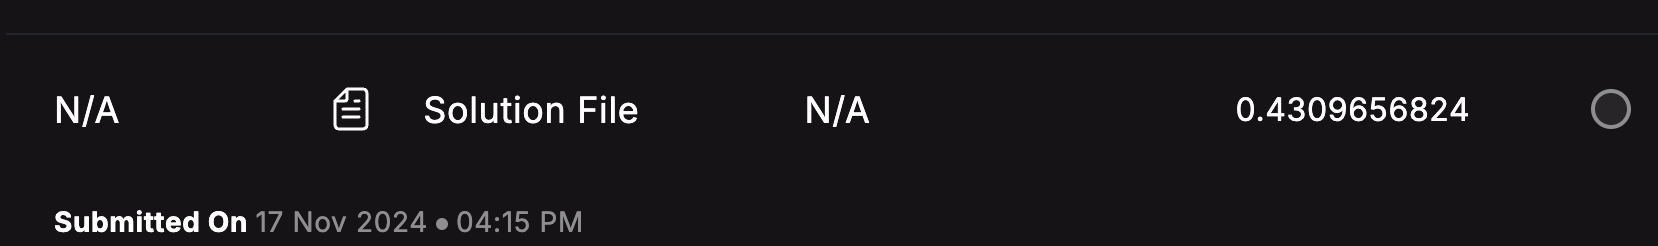

### Using GridSearch to hyper tune multi model along with ensembling

In [803]:
params_5 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3],
    'model__solver':['saga']
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[10,15,20],
    'model__criterion':['gini'],
    'model__max_features':['sqrt', 'log2']    
    },
    {
    'model': [RandomForestClassifier()],
    'model__max_depth':[None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__max_features':[None, 'sqrt', 'log2']
    },
    {
    'model': [LogisticRegression()],
    'model__penalty':['l1'],
    'model__C':[0.5,3],
    'model__solver':['liblinear']
    },
    {
    'model': [StackingClassifier(
    estimators=[
        ['sclf1',RandomForestClassifier()],
        ['sclf2',GradientBoostingClassifier()],
        ['sclf3',AdaBoostClassifier()],
        ['sclf4',xgb.XGBClassifier(eval_metric='f1')],
        ['sclf5',DecisionTreeClassifier(criterion='gini', max_depth=20, max_features='sqrt')],],
        final_estimator=LogisticRegression(penalty='l1',solver='liblinear')
    )],
    'model__sclf1__max_depth':[None, 10, 20, 30],
    'model__sclf2__n_estimators':[15,25],    
    'model__sclf3__n_estimators':[5,35],
    'model__sclf4__n_estimators':[50, 100, 150],
    }

]

In [804]:
grid_5 = GridSearchCV(estimator=model_pipeline, param_grid=params_5, 
                    cv=5, scoring='f1', n_jobs=-1, verbose=2)

In [ ]:
grid_5.fit(train_X_os, train_y_os)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/Users/suhaibmohamed/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/suhaibmohamed/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/suhaibmohamed/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/suhaibmohamed/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (vers

In [ ]:
grid_5.best_params_

In [ ]:
grid_5.best_estimator_

In [ ]:
new_model_5 = grid_5.best_estimator_

In [ ]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model_5)

In [ ]:
res_df_5 = pd.DataFrame(grid_5.cv_results_,)
pd.set_option('display.max_colwidth',500)
res_df_5[['params','mean_test_score','rank_test_score']]

In [ ]:
# updating the existing target values with predicted values
sub['is_promoted'] = new_model_5.predict(test)
sub.to_csv('wns_analytics_dataset/sub_5.csv',index=False)

### result uploaded in the analytics vidhya website and the recieved score

In [ ]:
joblib.dump(new_model_5,'wns_analytics_dataset/wns_pipeline_model.pkl')

In [ ]:
train_df.iloc[0]